In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib

import read_svc_spectra
import minispect

#read_svc_spectra.read_svc('./MinispectTrials')

In [2]:
#importlib.import_module(package='./0_readSpectra')

In [3]:
svc_spectra = pd.read_csv('./MinispectTrials/Spectra_ALL.csv')
print(svc_spectra.head())

   SR     FileName       Date     Time AMPM  WVL_339.0  WVL_340.5  WVL_342.0  \
0   0  1a_0000.sig  5/27/2021  3:58:03   PM       7.94       5.95       6.05   
1   1  1a_0001.sig  5/27/2021  3:58:03   PM       7.07       6.94       6.78   
2   2  1a_0002.sig  5/27/2021  3:58:03   PM       9.60       9.26       8.47   
3   3  1b_0000.sig  5/27/2021  4:00:25   PM       5.15       5.19       4.74   
4   4  1b_0001.sig  5/27/2021  4:00:25   PM       5.67       5.66       5.60   

   WVL_343.5  WVL_345.0  ...  WVL_2496.8  WVL_2499.0  WVL_2501.2  WVL_2503.4  \
0       6.49       6.85  ...        5.44        5.37        5.40        5.34   
1       6.82       6.51  ...        5.24        5.37        5.47        5.42   
2       8.33       8.22  ...        5.72        5.73        5.54        5.19   
3       4.26       4.26  ...        4.61        4.53        4.69        4.52   
4       5.04       4.96  ...        4.48        4.46        4.48        4.59   

   WVL_2505.7  WVL_2507.9  WVL_2510.1 

In [4]:
svc_wavelengths = [float(x[4:]) for x in svc_spectra.filter(regex='^WVL_').columns.tolist()]

### Basic parsing of raw minispect data

In [5]:
# def scansToArray(filename='scans.txt'):
#     scanfile = open(filename, 'r')
#     pd.DataFrame()
#     name=''
#     integration=''
#     scans = []

#     for line in scanfile:
#         line=line.strip()
#         colon = line.find(':')
#         if(line==''):
#             continue
#         elif(colon != -1):
#             name = line[:colon]
#             integration = line[colon+1:]
#         else:        
#             data = line.split(' ')
#             scan = {'name':name, 'integration':integration, 'data':data}
#             scans.append(scan)
#     return scans


# Create a Pandas Dataframe to hold raw Minispect Data
A 1D Gaussian kernel is appied to each scan with sigma=2, as recommended by the manufacturer

In [6]:
#minispect_spectra = pd.DataFrame.from_dict(minispect.rawTextScansToDataframe(gaussian=True, sigma=2))
minispect_spectra=minispect.rawTextScansToDataframe(gaussian=True, sigma=2)
minispect_wavelengths = np.linspace(340,850,288)
print(minispect_spectra)

    name                                               data
0    Ref  [180, 179, 178, 176, 174, 172, 170, 169, 169, ...
1    Ref  [178, 177, 176, 175, 173, 171, 170, 168, 168, ...
2    Ref  [181, 180, 178, 177, 174, 173, 171, 170, 169, ...
3    Ref  [179, 179, 178, 176, 174, 172, 170, 169, 168, ...
4    Ref  [180, 179, 178, 177, 175, 173, 171, 170, 170, ...
..   ...                                                ...
100   5a  [238, 236, 233, 229, 225, 220, 216, 212, 209, ...
101   5a  [235, 234, 231, 228, 224, 220, 216, 213, 210, ...
102   5a  [236, 234, 232, 228, 224, 221, 217, 214, 211, ...
103   5a  [235, 233, 230, 227, 223, 219, 215, 212, 209, ...
104   5a  [234, 232, 230, 226, 222, 218, 213, 210, 207, ...

[105 rows x 2 columns]


In [7]:
average_reference = np.mean(np.array(minispect_spectra[minispect_spectra['name'].str.contains('Ref')].data.tolist()).astype(int), axis=0)

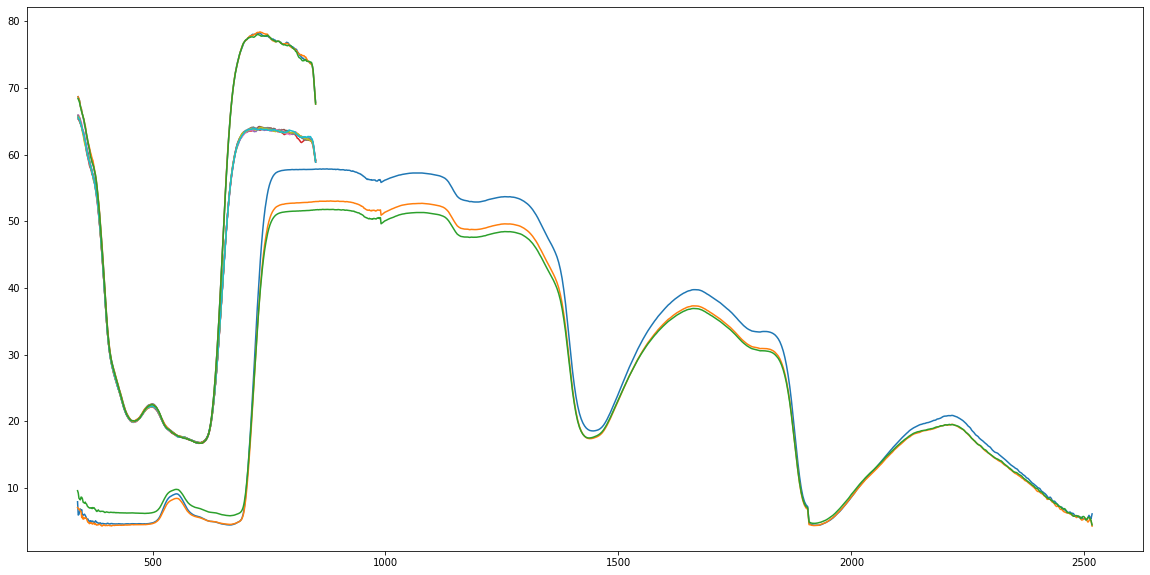

In [8]:
def plotSpectra(names):
    for name in names:
        svc_data = svc_spectra[svc_spectra['FileName'].str.contains(name)].filter(regex='^WVL_')
        ms_data = minispect_spectra[minispect_spectra['name'].str.contains(name)].data
        #print(ms_dataaverage_reference)
        plt.figure(figsize=(20,10))

        for svc in svc_data.iterrows():
            plt.plot(svc_wavelengths,svc[1])
        for ms in ms_data:
            ms = [float(x) for x in ms]
            plt.plot(minispect_wavelengths, (ms/average_reference)*50)
            #print(ms/average_reference*50)
            
        plt.show()

plotSpectra(['1a'], )

Simple plots reveal that the SVC and Hamatsu spectrometers are not cross-calibrated. The readings from the Minispect are shifted to lower wavelenghts. However, a cross-calibration could be used to ensure 

# Gitelson CHL index implementation
We are using Anatoly Gitelson's method for remote chlorophyll estimation as a reference (ground truth) from the SVC. Since each of the SVC scans are slightly different

In [10]:
minispect_spectra['relative'] = minispect_spectra['data'].apply(lambda x: x/average_reference*50)
print(minispect_spectra['relative'])

0      [50.055617352614014, 49.981384959046906, 50.03...
1      [49.49944382647386, 49.42293373045421, 49.4752...
2      [50.333704115684085, 50.260610573343264, 50.03...
3      [49.777530589543936, 49.981384959046906, 50.03...
4      [50.055617352614014, 49.981384959046906, 50.03...
                             ...                        
100    [66.18464961067852, 65.89724497393894, 65.4985...
101    [65.3503893214683, 65.33879374534625, 64.93628...
102    [65.62847608453836, 65.33879374534625, 65.2173...
103    [65.3503893214683, 65.0595681310499, 64.655172...
104    [65.07230255839822, 64.78034251675354, 64.6551...
Name: relative, Length: 105, dtype: object


In [54]:
# Calculate the Gitelson chlorophyll content estimation for each row in the SVC data. This will give us reference values for each leaf. 
# As recommended by https://calmit.unl.edu/people/agitelson2/pdf/2013/2013-JAG-Clevers-Gitelson.pdf, we use the soybean-based CI_red-edge estimation = R_800/R_704 - 1
# Soybean foliage is the most similar to the leaf foliage data collected. The coefficient of determination (r^2) is higher for CI red-edge in all cases. 

# Since the exact values are not available, we will use a simple linear interpolation between the two closest points to these wavelenghts to determine the reflectance value. 
# 
# For the SVC, these are {'WVL_799.6', 'WVL_800.8'} and {'WVL_703.8', 'WVL_705.1'} respectively. For the Hamamtsu, these are wavelengths 
# For the Hamamtsu, these are data[258] and data[259] for 800 nm data[204] and data[205] for 724 nm
# Finally, we use the linear regression coefficients presented in the paper to find the total chlorophyll content (g / m^2)

def gitelson_svc(svc_row):
    wvl_800 = ((svc_row['WVL_800.8'] - svc_row['WVL_799.6']) / (800.8 - 799.6)) * (800 - 799.6) + svc_row['WVL_799.6']
    wvl_704 = ((svc_row['WVL_705.1'] - svc_row['WVL_703.8']) / (705.1 - 703.8)) * (704 - 703.8) + svc_row['WVL_703.8']

    ci_red_edge = (wvl_800 / wvl_704) - 1

    slope = 0.2782
    y_intercept = 0.0564

    return slope * ci_red_edge + y_intercept

def gitelson_minispect(minispect_data):
    #wvl_800 = ((minispect_data[259] - minispect_data[258]) / (minispect_wavelengths[259] - minispect_wavelengths[258])) * (800 - minispect_wavelengths[258]) + minispect_data[258]
    wvl_800 = minispect_data[259]
    #wvl_704 = ((minispect_data[205] - minispect_data[204]) / (minispect_wavelengths[205] - minispect_wavelengths[204])) * (704 - minispect_wavelengths[204]) + minispect_data[204]
    wvl_704 = minispect_data[205]
    ci_red_edge = (wvl_800 / wvl_704) - 1

    slope = 0.2782
    y_intercept = 0.0564

    return slope * ci_red_edge + y_intercept


In [55]:
svc_spectra['gitelson'] = svc_spectra.apply(lambda x: gitelson_svc(x), axis=1)
minispect_spectra['gitelson'] = minispect_spectra['relative'].apply(lambda x: gitelson_minispect(x/average_reference))
print(svc_spectra.head())
print(minispect_spectra)

   SR     FileName       Date     Time AMPM  WVL_339.0  WVL_340.5  WVL_342.0  \
0   0  1a_0000.sig  5/27/2021  3:58:03   PM       7.94       5.95       6.05   
1   1  1a_0001.sig  5/27/2021  3:58:03   PM       7.07       6.94       6.78   
2   2  1a_0002.sig  5/27/2021  3:58:03   PM       9.60       9.26       8.47   
3   3  1b_0000.sig  5/27/2021  4:00:25   PM       5.15       5.19       4.74   
4   4  1b_0001.sig  5/27/2021  4:00:25   PM       5.67       5.66       5.60   

   WVL_343.5  WVL_345.0  ...  WVL_2499.0  WVL_2501.2  WVL_2503.4  WVL_2505.7  \
0       6.49       6.85  ...        5.37        5.40        5.34        5.35   
1       6.82       6.51  ...        5.37        5.47        5.42        5.12   
2       8.33       8.22  ...        5.73        5.54        5.19        5.28   
3       4.26       4.26  ...        4.53        4.69        4.52        4.23   
4       5.04       4.96  ...        4.46        4.48        4.59        4.92   

   WVL_2507.9  WVL_2510.1  WVL_2512.3 

As we can see, the Gitelson predictions of chlorophyll content from the spectra collected by the Hamamatsu sensor are significantly different from those sensed by the SVC. In the earlier visualization, there appears to be a shift of about 100 nanometers between the waveforms. 

Thus, we realize that some type of cross-calibration is required, but this may not be available. This brings us to the purpose of the experiment: without cross calibration, can a regression neural network achieve better results 

# Dataset Formation/Augmentation


In [63]:
# Gets a random average reference over frac randomly selected reference scans out of all reference scans. 

def get_random_avg_reference(frac=0.5):
    return np.mean(np.array(minispect_spectra[minispect_spectra['name'].str.contains('Ref')].sample(frac=frac, replace=True).data.tolist()).astype(int), axis=0)

In [69]:
print(get_random_avg_reference().shape)

(288,)


In [123]:
classes = minispect_spectra['name'].unique()
classes = classes[1:] # remove 'Ref' from our classes
print(classes)

['1a' '1b' '1c' '2a' '2b' '3a' '3b' '4' '5a']


In [124]:
class_readings = svc_class_spectra = svc_spectra[svc_spectra['FileName'].str.contains('1a') ]
random_svc_reading = svc_class_spectra.sample(frac=0.7, replace=True).filter(regex='^WVL_').mean()


reference = get_random_avg_reference()

minispect_class_spectra = minispect_spectra[minispect_spectra['name'] == '1a']
minispect_data_calibrated = minispect_class_spectra.sample(1, replace=True).data.to_numpy()[0]/reference

print(minispect_data_calibrated)
gitelson = gitelson_svc(random_svc_reading)
#print(gitelson)

[1.31293463 1.30635031 1.30520394 1.29270021 1.28550933 1.27721335
 1.26872247 1.25849335 1.24536694 1.23442136 1.21661721 1.20385471
 1.19526627 1.18343195 1.17664449 1.16481892 1.15555556 1.14540059
 1.13437268 1.12592593 1.11340206 1.09781022 1.08513709 1.06818182
 1.04662491 1.02243372 0.99470899 0.96860987 0.93448702 0.8994646
 0.86659065 0.82743604 0.79048112 0.75257227 0.716141   0.6824978
 0.65381391 0.62946608 0.60943542 0.59070465 0.57789128 0.56490728
 0.55644879 0.54869684 0.53799597 0.52981878 0.52112222 0.51181847
 0.50277264 0.49519231 0.4897481  0.48091168 0.47097844 0.46314661
 0.45286938 0.4432133  0.43650599 0.42877561 0.42369338 0.41751759
 0.41422222 0.40985394 0.40669241 0.40330438 0.40109083 0.40008335
 0.39817503 0.39834711 0.40041195 0.40106842 0.40196883 0.40319607
 0.40589198 0.40686275 0.40912795 0.41113142 0.41415571 0.41817451
 0.42197802 0.42639192 0.43031017 0.43495146 0.43745203 0.44107617
 0.44169942 0.44255319 0.44371225 0.44396083 0.44484434 0.444762

In [134]:
#To generate our dataset, we augment the dataset in hopes of making the neural network resistent to noise. 

def generate_minispect_dataset(samples_per_class=100):
    minispect_dataset = []
    for item in classes:
        minispect_class_spectra = minispect_spectra[minispect_spectra['name'] == item]
        svc_class_spectra = svc_spectra[svc_spectra['FileName'].str.contains(item)]

        for i in range(samples_per_class):
            reference = get_random_avg_reference()

            minispect_data_calibrated = minispect_class_spectra.sample(1, replace=True).data.to_numpy()[0]/reference
            random_avg_svc_reading = svc_class_spectra.sample(frac=0.5, replace=True).filter(regex='^WVL_').mean()
            gitelson = gitelson_svc(random_avg_svc_reading)

            sample={'name': item, 'data':minispect_data_calibrated, 'gitelson':gitelson}

            minispect_dataset.append(sample)

    return pd.DataFrame.from_dict(minispect_dataset)



In [135]:
dataset=generate_minispect_dataset()
print(dataset)

    name                                               data  gitelson
0     1a  [1.3129346314325452, 1.312849162011173, 1.3052...  1.013151
1     1a  [1.3166666666666667, 1.3110181311018132, 1.309...  1.013151
2     1a  [1.3129346314325452, 1.3081761006289307, 1.305...  1.025781
3     1a  [1.3148404993065188, 1.309192200557103, 1.3062...  1.013151
4     1a  [1.3157529493407356, 1.3156794425087108, 1.308...  1.025781
..   ...                                                ...       ...
895   5a  [1.3036211699164346, 1.2960893854748603, 1.293...  0.898987
896   5a  [1.3092926490984744, 1.3045296167247387, 1.295...  0.915066
897   5a  [1.309192200557103, 1.302585604472397, 1.29486...  0.898987
898   5a  [1.3175816539263376, 1.3119330076762037, 1.304...  0.955997
899   5a  [1.3082811412665274, 1.3016759776536313, 1.293...  1.006909

[900 rows x 3 columns]


In [136]:
dataset.to_csv('minispect_dataset.csv')